In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Classe real',
           xlabel='Classe prevista')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[2869  111]
 [ 526  143]]
[[2896  112]
 [ 534  107]]
[[2781  195]
 [ 553  120]]
[[2864  145]
 [ 492  148]]
[[2863  130]
 [ 521  135]]
[[440 203]
 [257 378]]


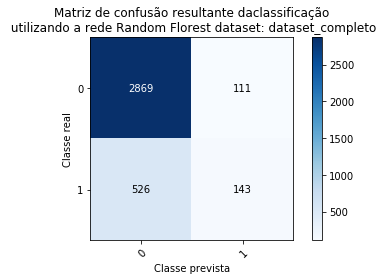

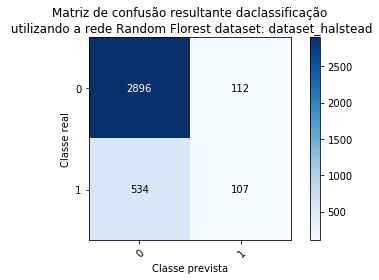

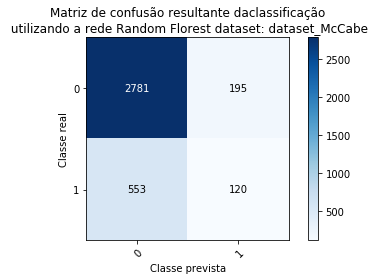

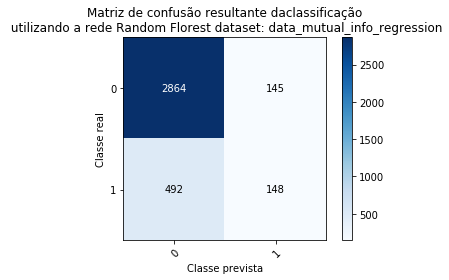

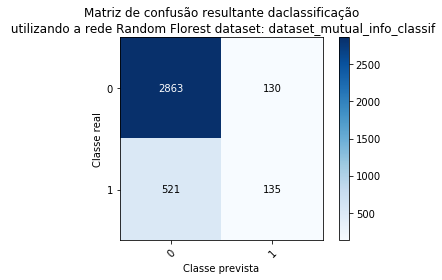

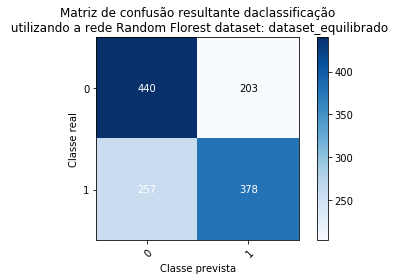

In [3]:
datasets = ['dataset_completo','dataset_halstead','dataset_McCabe','data_mutual_info_regression',
            'dataset_mutual_info_classif','dataset_equilibrado']
for dataset in datasets:
    data = pd.read_csv('C:/Users/Camila/Desktop/Data-Science-Project/dataset2/'+dataset+'.csv')
    
#   Separação dos dados e dos rótulos.
    X = data.drop('defects',axis=1)
    y = data['defects']
    
#   Dividir os dados em conjuntos de treinamento e teste.
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
#   Normalização de dados.
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    rfc = RandomForestClassifier(n_estimators=10)
    rfc.fit(X_train,y_train)
    
    predictions = rfc.predict(X_test)
        
    plot_confusion_matrix(y_test, predictions, classes=np.array([0,1]),
                      title='Matriz de confusão resultante da\
classificação\n utilizando a rede Random Florest dataset: '+dataset);
    #print(classification_report(y_test,predictions))

<div style='text-align:left;width:40%;float:left;'>
    <a href="../eda/3.2_Análise_Exploratória_dos_Dados_McCabe.ipynb">Anterior</a>
</div>
<div style='text-align:right;width:30%; float:right'>
    <a href="./RandomForest-100.ipynb">Próximo</a>
</div>

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652